## Sales Analysis

In [109]:
# Import Necessary Library

import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
files = os.listdir('.\Sales_Data')       
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [19]:
f1 = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
print(f1.shape)
f1.head()

(18383, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Task1 : Merging 12 months of data into a single file

In [21]:
df = pd.DataFrame()

for i in files:
    df1 = pd.read_csv("./Sales_Data/" + i)
    df = pd.concat([df,df1] , axis =0)

df.shape

(186850, 6)

In [23]:
df.to_csv("All_files.csv", index = False)

In [110]:
# reading file

import_data = pd.read_csv("./All_files.csv")
import_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Lets Make A Copy of Data to Begin With Some Operations**

In [111]:
data = import_data.copy()

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Lets Clean Data Seems there are null values

In [113]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [114]:
# Lets Drop The Columns
print("Before Droping : " ,data.shape[0])
data.dropna(inplace = True)
print("After Droping : " ,data.shape[0])

Before Droping :  186850
After Droping :  186305


In [115]:
# lets also see duplicate values

data.duplicated().sum()

618

In [116]:
# lets drop Duplicates
print("Before Droping : " , data.shape[0])
data.drop_duplicates(inplace= True)
print("After Droping : " ,data.shape[0])

Before Droping :  186305
After Droping :  185687


In [117]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [118]:
data['date'] = data['Order Date'].str[:8]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04/30/19


In [119]:
# lets Change it to datetime
pd.to_datetime(data['date'])

ParserError: Unknown string format: Order Da

Theres Some Value 'Order Da' in our month column lets Check

In [120]:
data[data['date'] == 'Order Da']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Da


In [121]:
# Lets Drop This Row as well

data.drop(index=519, inplace=True)

In [122]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04/30/19


In [123]:
# Now Lets change date column to datetime and add some more columns
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['day_name'] = data['date'].dt.day_name()
data['Month'] = data['date'].dt.month_name()
data['hour'] = pd.to_datetime(data['Order Date']).dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,day,day_name,Month,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,19,Friday,April,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,7,Sunday,April,22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,30,Tuesday,April,9


In [151]:
# lets also add city column as well
import re

def city(string):
    pattern = ','
    res = re.split(pattern,string)
    return res[1]

data['city'] = data['Purchase Address'].apply(city)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,day,day_name,Month,hour,Total Sales,city
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,19,Friday,April,8,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,7,Sunday,April,22,99.99,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14,600.00,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14,11.99,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,30,Tuesday,April,9,11.99,Los Angeles


In [222]:
# changing data Types of columns

dict = {'Quantity Ordered' : 'int32',
        'Price Each' : 'float32',
        'Order ID' : 'int32'
        }

data = data.astype(dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float32       
 4   Order Date        185686 non-null  object        
 5   Purchase Address  185686 non-null  object        
 6   date              185686 non-null  datetime64[ns]
 7   day               185686 non-null  int64         
 8   day_name          185686 non-null  object        
 9   Month             185686 non-null  object        
 10  hour              185686 non-null  int64         
 11  Total Sales       185686 non-null  float64       
 12  city              185686 non-null  object        
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int

### Lets See total sales by adding a column

In [126]:
data['Total Sales'] = round(data['Quantity Ordered']*data['Price Each'],2)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,day,day_name,Month,hour,Total Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,19,Friday,April,8,23.90
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,7,Sunday,April,22,99.99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14,600.00
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14,11.99
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,30,Tuesday,April,9,11.99


In [128]:
#Revenue by Day

day_sales = data.groupby(['day'])['Total Sales'].sum().reset_index(name = 'Revenue')

day_sales

,day,Revenue
0,1,1164859.49
1,2,1137215.59
2,3,1074294.06
3,4,1163640.17
4,5,1135007.86
5,6,1151786.51
6,7,1093460.78
7,8,1106530.63
8,9,1169049.22
9,10,1168880.92


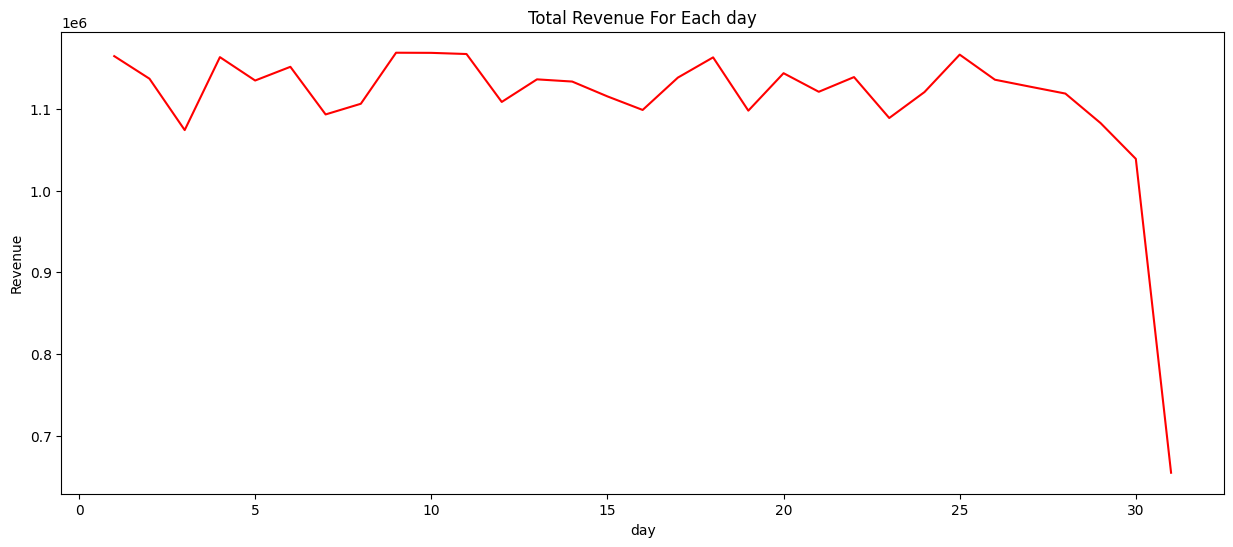

In [134]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'day', y = 'Revenue', data = day_sales, color = 'r')
plt.title("Total Revenue For Each day")
plt.show()

In [99]:
#Revenue by months

month_sales = data.groupby(['Month'])['Total Sales'].sum().reset_index(name = 'Revenue')
month_sales = month_sales.sort_values(by = 'Revenue', ascending = False)
month_sales

,Month,Revenue
2,December,4608295.70
10,October,3734777.86
0,April,3389217.98
9,November,3197875.05
8,May,3150616.23
7,March,2804973.35
5,July,2646461.32
6,June,2576280.15
1,August,2241083.37
3,February,2200078.08


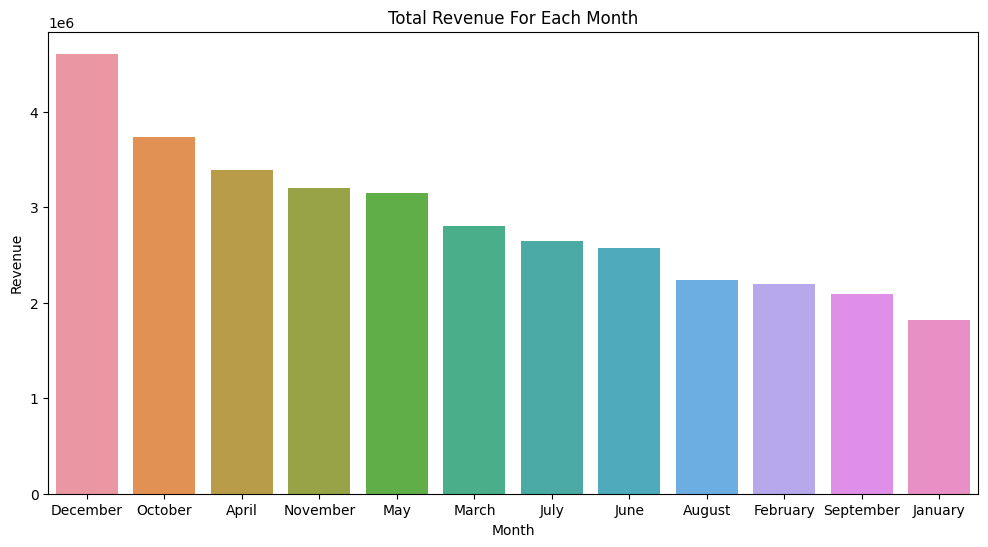

In [100]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Month', y = 'Revenue', data = month_sales)
plt.title("Total Revenue For Each Month")
plt.show()

**We can see Desember which is year end have given most revenue while January least**

In [136]:
#Revenue by Day

day_sales = data.groupby(['day_name'])['Total Sales'].sum().reset_index(name = 'Revenue')

day_sales

,day_name,Revenue
0,Friday,4853642.26
1,Monday,4877588.21
2,Saturday,4900195.58
3,Sunday,4927249.40
4,Thursday,4833763.73
5,Tuesday,5086275.40
6,Wednesday,4986823.36


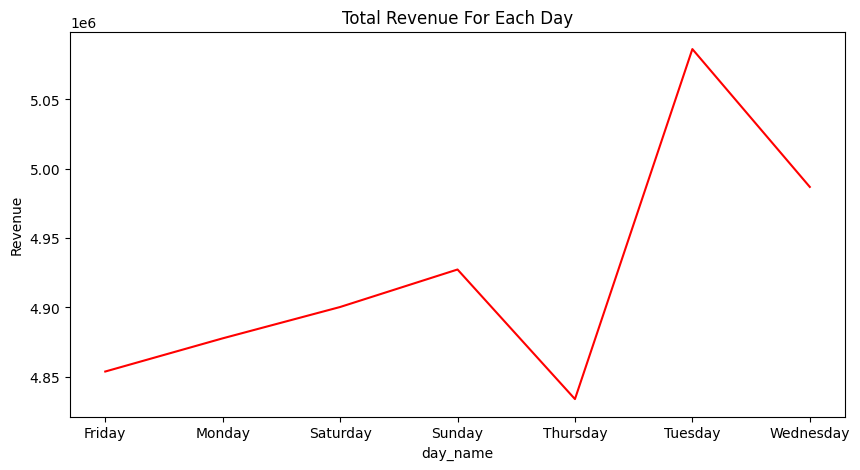

In [328]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'day_name', y = 'Revenue', data = day_sales,color = 'r')
plt.title("Total Revenue For Each Day")
plt.show()

**We have most Revenue On Thursday while least on Tuesday**

In [142]:
# total Orders by Hour

orders = data.groupby(['hour'])['Order ID'].count().reset_index(name = 'Total Orders')

orders

,hour,Total Orders
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852
5,5,1320
6,6,2481
7,7,4002
8,8,6252
9,9,8740


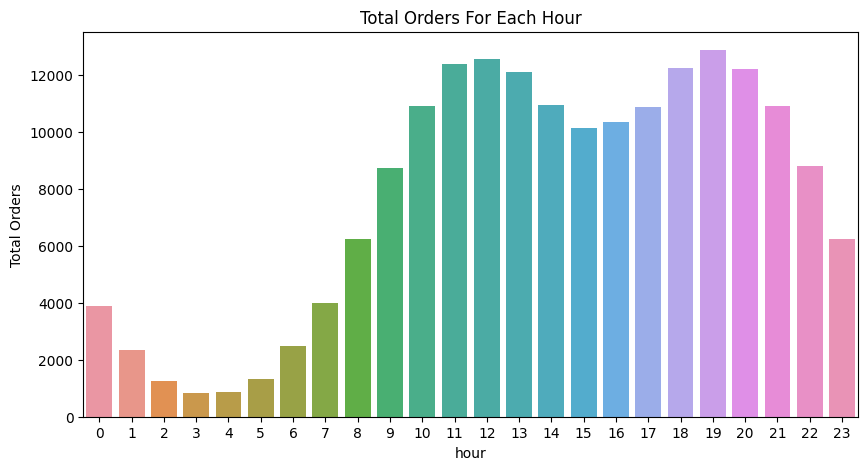

In [325]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'hour', y = 'Total Orders', data = orders)
plt.title("Total Orders For Each Hour")
plt.show()

**Most orders are Place between 10 AM to 9 PM while there`s small dip at afternoon**

In [144]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,day,day_name,Month,hour,Total Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,19,Friday,April,8,23.90
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,7,Sunday,April,22,99.99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14,600.00
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14,11.99
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,30,Tuesday,April,9,11.99


In [156]:
data['city'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [152]:
city_sales = data.groupby(['city'])['Total Sales'].sum().reset_index(name = 'Revenue')
city_sales

,city,Revenue
0,Atlanta,2794199.07
1,Austin,1818044.33
2,Boston,3658627.65
3,Dallas,2765373.96
4,Los Angeles,5448304.28
5,New York City,4661867.14
6,Portland,2319331.94
7,San Francisco,8254743.55
8,Seattle,2745046.02


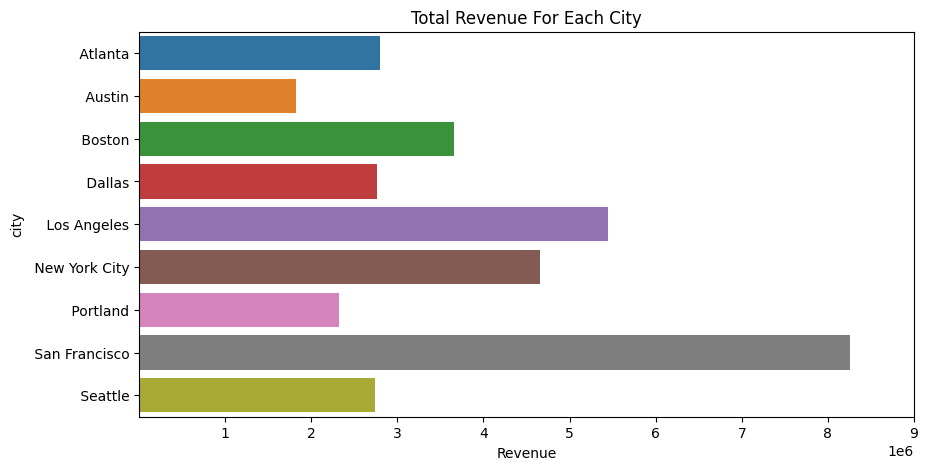

In [303]:
plt.figure(figsize=(10,5))
sns.barplot(y = 'city', x = 'Revenue', data = city_sales)
plt.xlim(1,9000000)
plt.title("Total Revenue For Each City")
plt.show()

In [193]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,day,day_name,Month,hour,Total Sales,city
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,19,Friday,April,8,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,7,Sunday,April,22,99.99,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14,600.00,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,12,Friday,April,14,11.99,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,30,Tuesday,April,9,11.99,Los Angeles


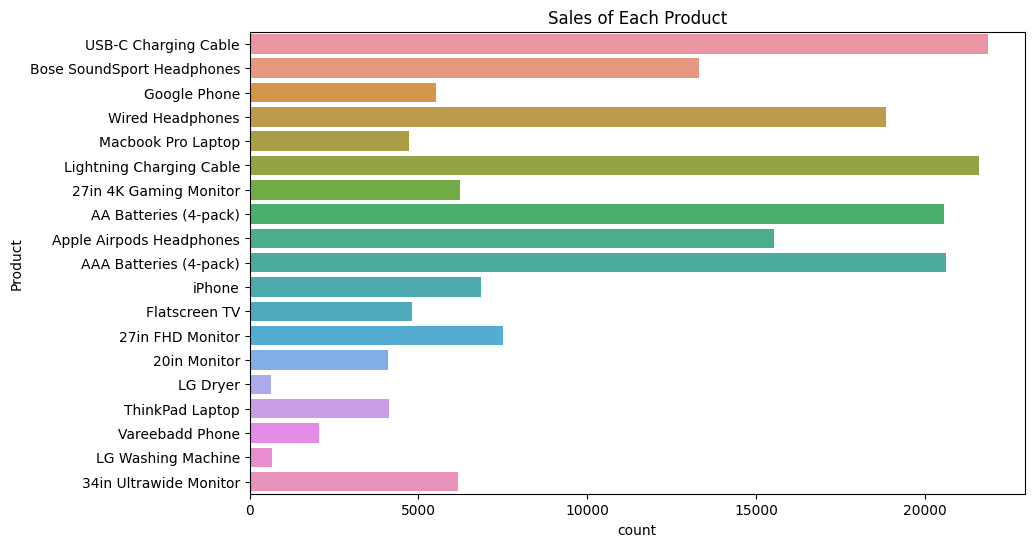

In [314]:
plt.figure(figsize = (10,6))
sns.countplot(y = data['Product'])
plt.title("Sales of Each Product")
plt.show()

# Thank You